In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "06").all()

In [6]:
#  3. Convert the June temperatures to a list.
june_temps = list(np.ravel(results))

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns = ["June"])

In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_stats = june_temps_df.describe()
print(june_temps_stats)

              June
count  1700.000000
mean     74.944118
std       3.257417
min      64.000000
25%      73.000000
50%      75.000000
75%      77.000000
max      85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "12").all()

In [10]:
# 7. Convert the December temperatures to a list.
dec_temps = list(np.ravel(results))

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns = ["Dec"])

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_stats = dec_temps_df.describe()
print(dec_temps_stats)

               Dec
count  1517.000000
mean     71.041529
std       3.745920
min      56.000000
25%      69.000000
50%      71.000000
75%      74.000000
max      83.000000


## Code for Summary

In [13]:
# Merge the stats into one table
combined_temps_stats = june_temps_stats.join(dec_temps_stats, how = "inner")
combined_temps_stats


,June,Dec
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


Text(0, 0.5, 'Temperature °F')

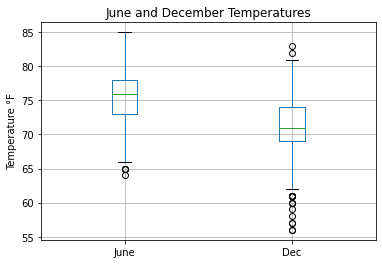

In [24]:
# Merge June and Dec temps into one dataframe
combined_temps = june_temps_df.join(dec_temps_df, how = "inner")

# Consider a histogram of temps/precipitation
# Make boxplot of temps
combined_temps.boxplot()
plt.title("June and December Temperatures")
plt.ylabel("Temperature °F")

Text(0.5, 0, 'Degrees Fahrenheit')

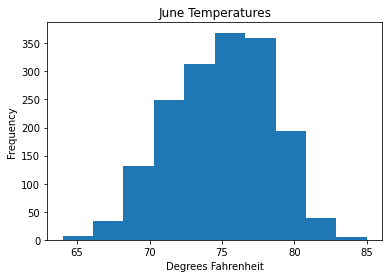

In [37]:
# Make histogram of June temps
june_temps_df.plot.hist(legend=None)
plt.title("June Temperatures")
plt.xlabel("Degrees Fahrenheit")

Text(0.5, 0, 'Degrees Fahrenheit')

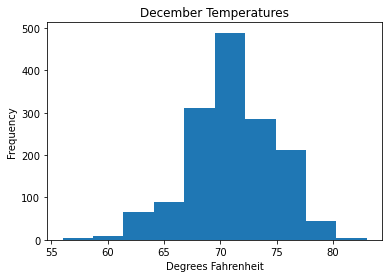

In [38]:
# Make histogram of December temps
dec_temps_df.plot.hist(legend = None)
plt.title("December Temperatures")
plt.xlabel("Degrees Fahrenheit")

Text(0, 0.5, 'Rainfall (Inches)')

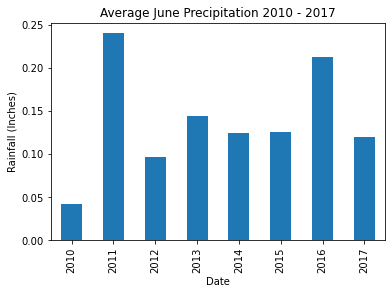

In [48]:
# Get precipitation data for June

# Get a list from database for precipitation in June
june_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
june_prcp_df = pd.DataFrame(june_prcp, columns = ["Date", "Precipitation"])
june_prcp_df.set_index(june_prcp_df['Date'], inplace=True)
june_prcp_df.sort_index()
#print(june_prcp_df.describe())
june_prcp_df.dropna()
june_prcp_df['Date']= pd.to_datetime(june_prcp_df['Date'])
june_prcp_stats = june_prcp_df.groupby(june_prcp_df['Date'].map(lambda x: x.year)).describe()
june_mean = june_prcp_stats['Precipitation', 'mean']
june_mean.plot.bar()
plt.title("Average June Precipitation 2010 - 2017")
plt.ylabel("Rainfall (Inches)")
#june_prcp_df.plot.line()

Text(0, 0.5, 'Rainfall (Inches)')

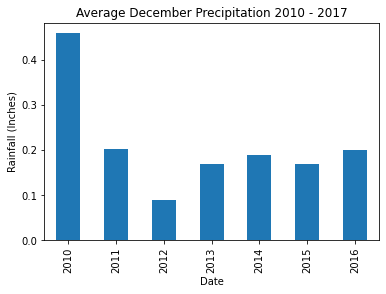

In [49]:
# Get a list from database for precipitation in June
dec_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == "12").all()

dec_prcp_df = pd.DataFrame(dec_prcp, columns = ["Date", "Precipitation"])
dec_prcp_df.set_index(dec_prcp_df['Date'], inplace=True)
dec_prcp_df.sort_index()
dec_prcp_df.dropna()
dec_prcp_df['Date']= pd.to_datetime(dec_prcp_df['Date'])
dec_prcp_stats = dec_prcp_df.groupby(dec_prcp_df['Date'].map(lambda x: x.year)).describe()
dec_mean = dec_prcp_stats['Precipitation', 'mean']
dec_median = dec_prcp_stats['Precipitation', '50%']
dec_mean.plot.bar()
plt.title("Average December Precipitation 2010 - 2017")
plt.ylabel("Rainfall (Inches)")